In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# === Chargement des données ===
df = pd.read_csv("df_magazin.csv", sep=",")
df = df.drop('nom_entreprise_clean', axis=1)
df.head()

,nom_entreprise,code_postal,localite,Delegation,Distance
0,Carrefour,8090.0,Kelibia,Nabeul,73.203019
1,Carrefour,3021.0,Sakiet Ezzit,Sfax,225.979734
2,Carrefour,2016.0,Carthage Byrsa,Carthage,15.158293
3,Carrefour,2034.0,Ezzahra,Ben Arous,13.841509
4,Carrefour,2250.0,Degache,Tozeur,365.774893


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib

# === Chargement des données ===
df = pd.read_csv("df_magazin.csv", sep=",")
df = df.drop('nom_entreprise_clean', axis=1)

# === Cible : Distance ===
y = df['Distance']

# === Encodage des variables catégorielles ===
categorical_cols = ['nom_entreprise', 'code_postal', 'localite', 'Delegation']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

# === Dataset final ===
X = encoded_df

# === Split Train/Test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Modèles (KNN est inclus uniquement pour analyse, pas pour sauvegarde)
models = {
    'KNN': KNeighborsRegressor(n_neighbors=7),
    'Random Forest': RandomForestRegressor(n_estimators=50, max_depth=7, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# === Entraînement, évaluation et sélection du meilleur modèle (hors KNN)
best_model = None
best_r2 = -np.inf
best_name = ""
model_names = []
r2_scores = []

print("\n📊 Résultats des modèles :")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"\n🔹 {name} :")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

    model_names.append(name)
    r2_scores.append(r2)

    if name != "KNN" and r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_name = name

# === Sauvegarde du meilleur modèle (hors KNN)
joblib.dump(best_model, f"{best_name.lower().replace(' ', '_')}_model.pkl")
print(f"\n✅ Modèle sauvegardé (hors KNN) : {best_name} avec R² = {best_r2:.4f}")





📊 Résultats des modèles :

🔹 KNN :
R² Score: 1.0000
MAE: 0.00
RMSE: 0.00

🔹 Random Forest :
R² Score: 0.9415
MAE: 20.37
RMSE: 26.03

🔹 Gradient Boosting :
R² Score: 0.9966
MAE: 5.79
RMSE: 6.29

✅ Modèle sauvegardé (hors KNN) : Gradient Boosting avec R² = 0.9966


In [ ]:
import joblib

# Sauvegarde du modèle
joblib.dump(best_model, "best_model.pkl")

# Sauvegarde de l'encodeur (si vous utilisez OneHotEncoder ou tout autre encodeur)
joblib.dump(encoder, "encoder.pkl")


['encoder.pkl']


📊 Résultats des modèles :

🔹 KNN :
R² Score: 1.0000
MAE: 0.00
RMSE: 0.00

🔹 Random Forest :
R² Score: 0.9415
MAE: 20.37
RMSE: 26.03

🔹 Gradient Boosting :
R² Score: 0.9966
MAE: 5.79
RMSE: 6.29

✅ Modèle sauvegardé (hors KNN) : Gradient Boosting avec R² = 0.9966


<ipython-input-8-a85bbf31e92e>:85: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


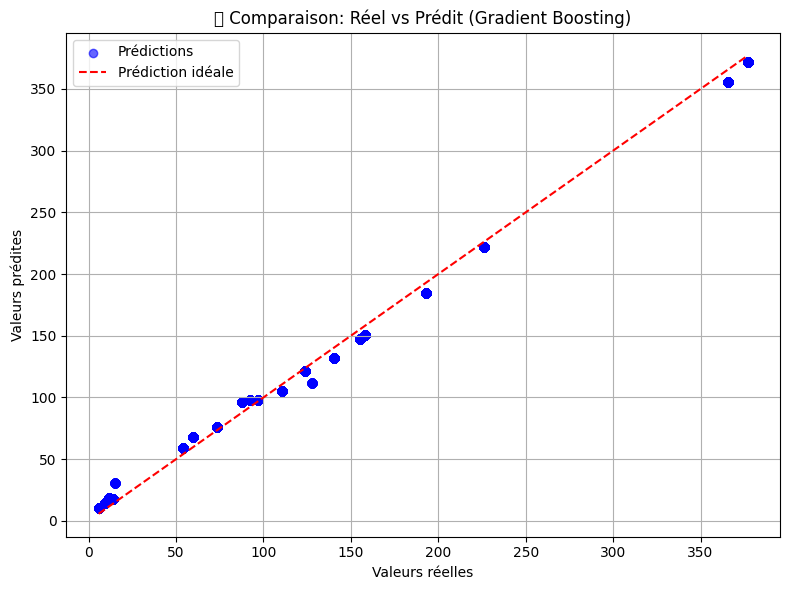

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib

# === Chargement des données ===
df = pd.read_csv("df_magazin.csv", sep=",")
df = df.drop('nom_entreprise_clean', axis=1)

# === Cible : Distance ===
y = df['Distance']

# === Encodage des variables catégorielles ===
categorical_cols = ['nom_entreprise', 'code_postal', 'localite', 'Delegation']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

# === Dataset final ===
X = encoded_df

# === Split Train/Test ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Modèles (KNN est inclus uniquement pour analyse, pas pour sauvegarde)
models = {
    'KNN': KNeighborsRegressor(n_neighbors=7),
    'Random Forest': RandomForestRegressor(n_estimators=50, max_depth=7, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# === Entraînement, évaluation et sélection du meilleur modèle (hors KNN)
best_model = None
best_r2 = -np.inf
best_name = ""
model_names = []
r2_scores = []

print("\n📊 Résultats des modèles :")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"\n🔹 {name} :")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

    model_names.append(name)
    r2_scores.append(r2)

    if name != "KNN" and r2 > best_r2:
        best_r2 = r2
        best_model = model
        best_name = name

# === Sauvegarde du meilleur modèle et de l'encodeur
joblib.dump(best_model, "best_model.pkl")
joblib.dump(encoder, "encoder.pkl")
print(f"\n✅ Modèle sauvegardé (hors KNN) : {best_name} avec R² = {best_r2:.4f}")

# === Prédiction avec le meilleur modèle
y_pred_best = best_model.predict(X_test)

# === Affichage du graphique comparatif
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.6, label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Prédiction idéale')

plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title(f'📈 Comparaison: Réel vs Prédit ({best_name})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import joblib
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Charger le modèle et l'encodeur
best_model = joblib.load("best_model.pkl")
encoder = joblib.load("encoder.pkl")

# Fonction pour prédire la distance
def predict_distance(nom_entreprise, code_postal, localite, Delegation):
    # Créer un DataFrame avec les nouvelles données d'entrée
    new_data = pd.DataFrame({
        'nom_entreprise': [nom_entreprise],
        'code_postal': [code_postal],
        'localite': [localite],
        'Delegation': [Delegation]
    })

    # Encoder les variables catégorielles (même traitement qu'au moment de l'entraînement)
    encoded = encoder.transform(new_data[['nom_entreprise', 'code_postal', 'localite', 'Delegation']])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['nom_entreprise', 'code_postal', 'localite', 'Delegation']))

    # Prédire la distance
    distance_predite = best_model.predict(encoded_df)

    return distance_predite[0]

# Exemple d'entrée
nom_entreprise = 'Carrefour'  # Remplacez par un nom d'entreprise réel
code_postal = '(8090.0)'  # Remplacez par un code postal réel
localite = 'Kelibia	'  # Remplacez par une localité réelle
Delegation = 'Nabeul'  # Remplacez par une délégation réelle

distance_predite = predict_distance(nom_entreprise, code_postal, localite, Delegation)
print(f"La distance prédite est : {distance_predite}")


La distance prédite est : 72.51852580221704
